In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, chi2, SelectPercentile, mutual_info_regression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
import math
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
SEED = 4426008 #np.random.randint(2**32)
np.random.seed(SEED)

In [3]:
just_scoring = False
if just_scoring:
  folder = "just_scoring/"
else:
  folder = "testing/"
folder = folder + ""
raw = folder + "outlier_detected/" #"feature_reduced/"
preprocessed = folder + "feature_reduced2/"

In [4]:
x_train = pd.read_csv(raw + 'X_train_preprocessed.csv',index_col=['id'])
x_test = pd.read_csv(raw + 'X_test_preprocessed.csv',index_col=['id'])
y_train = pd.read_csv(raw + 'y_train_preprocessed.csv',index_col=['id'])
y_test = pd.read_csv(raw + 'y_test_preprocessed.csv',index_col=['id'])

In [5]:
%%time
from sklearn.feature_selection import RFECV
estimator = ExtraTreesRegressor(n_estimators = 1000, n_jobs=-1)
selector = RFECV(estimator, n_jobs=-1)
selector.fit(np.array(x_train), np.array(y_train).squeeze())
cols_etr = selector.get_support(indices=True)

x_train_etr = x_train.iloc[:, cols_etr]
x_test_etr = x_test[[col for col in x_train_etr.columns]]

CPU times: total: 51min 16s
Wall time: 9min 31s


C:\Users\david\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


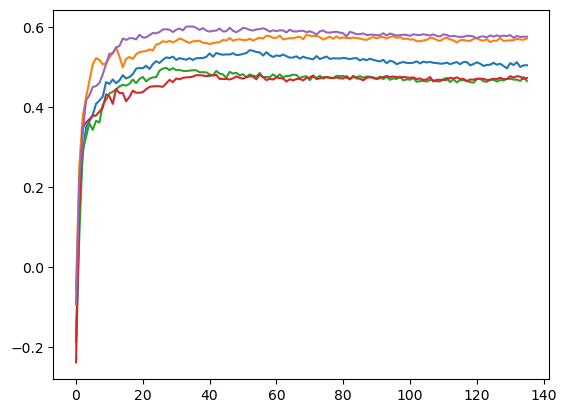

In [15]:
rfecv = selector
plt.plot(
    range(len(rfecv.grid_scores_)),
    rfecv.grid_scores_,
)
plt.show()

In [11]:
x_train_etr.to_csv(preprocessed + 'X_train_etr_preprocessed.csv',index_label="id")
x_test_etr.to_csv(preprocessed + 'X_test_etr_preprocessed.csv',index_label="id")
y_train.to_csv(preprocessed + 'y_train_preprocessed.csv',index_label="id")
y_test.to_csv(preprocessed + 'y_test_preprocessed.csv',index_label="id")

In [12]:
x_test_etr

,x2,x42,x92,x113,x115,x133,x159,x176,x193,x194,...,x641,x642,x654,x682,x702,x712,x720,x726,x742,x828
id,,,,,,,,,,,,,,,,,,,,,
0.0,-0.052082,-0.063381,-0.730818,0.451301,-0.512872,0.428066,-0.396278,1.022496,-0.579145,0.257176,...,0.297210,-0.212979,-0.021391,0.858694,-0.419481,0.744202,0.701366,0.903744,0.351185,0.102894
1.0,-0.526178,0.443824,-0.406326,-0.396644,0.686439,-0.473328,0.694022,-0.752490,-0.725612,-0.101612,...,1.129313,0.461483,-0.128730,0.806573,1.112047,0.376214,0.535998,0.461596,-0.170260,0.274263
2.0,-0.114546,-1.168189,-0.228096,1.135108,-0.146452,-0.269773,0.024703,0.013242,-0.484252,-0.144678,...,-0.050483,0.185764,-0.210965,0.685353,0.315730,-1.672003,-0.959849,-1.083542,-0.763296,-1.210373
3.0,-1.447348,-0.424719,0.288199,-2.129785,-0.321329,-0.742312,-0.305417,-0.731336,-1.091026,-0.672602,...,0.146608,1.410559,-0.992221,0.055513,-0.443448,-0.959713,-1.031734,-0.830993,-1.173763,1.035188
4.0,0.620398,-0.459478,-0.707959,0.384720,-0.379497,0.145906,1.295302,0.554642,1.366621,-0.847329,...,-0.097514,-1.336109,-0.647940,-0.195896,2.207747,-0.059382,0.366235,0.129956,0.026795,-0.531095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771.0,-0.108230,-0.384830,-0.450357,-0.807625,-0.431521,-0.189738,-0.582715,0.330428,-0.037022,-0.893916,...,-0.669833,-0.561693,0.166626,0.347973,-0.754152,0.044225,0.010094,0.087851,0.573178,-1.371935
772.0,-0.271181,-0.521404,0.268075,-0.413275,0.024515,-0.912462,0.415356,-0.580995,-0.207123,-0.915764,...,0.841848,0.990220,-0.357479,0.684183,0.038050,-0.218014,-0.363486,-0.198404,-0.732710,0.315621
773.0,-0.303574,-0.505196,0.204230,-0.818202,0.533589,0.444682,0.676206,0.738453,0.265118,0.106055,...,0.894575,0.309961,0.099724,0.011377,0.502141,0.090074,-0.042329,0.421356,-0.107416,0.071764
